# Capstone Project - The Battle of the Neighborhoods

### Applied Data Science Project by IBM/Coursera

# Introduction

We want to open a new coffee shop in Melbourne. We want to identify current locations where we have coffee shops. We will use `Four Square` data to determine which district in Melbourne currently have coffee shops. This will tell us which districts have more coffee shops and which have less

# Business Problem

`Melbourne` is the capital and most-populous city of the Australian state of Victoria, and the second-most populous city in Australia and Oceania.

Melbourne is known for its bars, street art and coffee culture. As a coffee lover city, it makes complete sense to open coffee shop. The challenge is to understand which district is the best option to open the new coffee shop.

# Target Audience

- Enterpreneurs who wants to open a new coffee shop in the city however, are not sure where to open a new shop
- People who already have a shop and want to open a new franchise in different district

# Data Description

 - Brief information about Melbourne:
 https://en.wikipedia.org/wiki/Melbourne
 
 - Link of Melbourne Districts:
 https://en.wikipedia.org/wiki/Postal_district_numbers_of_Melbourne
 
 - Four Square API link:
 https://developer.foursquare.com/docs/

### Lets import libraries

In [3]:
import requests
from bs4 import BeautifulSoup

We will use Link of Melbourne Districts to extract list of all the districts in Melbourne

In [4]:
url = "https://en.wikipedia.org/wiki/Postal_district_numbers_of_Melbourne"
wiki_url = requests.get(url)
wiki_url = requests.get(url).text

In [6]:
soup = BeautifulSoup(wiki_url, "html.parser")
district = []

my_table = soup.find('table',{'class':'wikitable sortable'})

dist = []
for td in my_table.find_all('td'):
    row_data = []
    for a in td.find_all('a'):
        row_data.append(a.text)
        if len(row_data) ==0:
            continue
        else:
            dist.append(row_data[0])

import pandas as pd
dist = pd.DataFrame(dist,columns=['Melbourne Districts'])
dist

,Melbourne Districts
0,Abbotsford
1,Aerodrome Essendon
2,Essendon
3,Albert Park
4,Albert Park
...,...
316,Windsor
317,Moorabbin
318,Yarraville
319,Yarraville


## Getting Geographical Coordinates

In [7]:
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle json file
from geopy.geocoders import Nominatim # to convert an address into latitude and longitude values
from pandas.io.json import json_normalize # to transfer JSON file into panda Dataframe

# For Visualization
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.pyplot as plt

# for Clustering
from sklearn.cluster import KMeans

import folium # to render map
import geocoder

print('all libraries imported successfully')

all libraries imported successfully


### Getting Latitude and Longitude of Melbourne City

In [8]:
# Co-ordinates of Melbourne City

address = 'melbourne, australia'

geolocator = Nominatim(user_agent='can_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The Geographical coordinates of Melbourne are {}, {}.".format(latitude,longitude))

The Geographical coordinates of Melbourne are -37.8142176, 144.9631608.


#### Now we will get latitude and longitude of each district in Melbourne

In [10]:
# getting coorrd of each district

long = []
latit = []
for district in dist['Melbourne Districts'].to_list():
    
    # initialize varialbe to None
    lat_lng_coords = None
    
    # Loop until we get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Melbourne, Australia'.format(district))
        lat_lng_coords = g.latlng
    
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    
    latit.append(latitude)
    long.append(longitude)

We will add these coordiantes into our dist dataframe

In [11]:
dist['Latitude'] = pd.DataFrame(latit)
dist['Longitude'] = pd.DataFrame(long)
dist

,Melbourne Districts,Latitude,Longitude
0,Abbotsford,-37.803060,144.997180
1,Aerodrome Essendon,-37.751540,144.909510
2,Essendon,-37.751540,144.909510
3,Albert Park,-37.844040,144.951260
4,Albert Park,-37.844040,144.951260
5,Alphington,-37.779420,145.025030
6,Altona,-37.863820,144.824820
7,Altona North,-37.830470,144.841340
8,Altona North,-37.830470,144.841340
9,Footscray West,-37.808946,144.927116


There are duplicate values, we will drop duplicate values from our dataframe

In [12]:
dist.shape

(321, 3)

In [13]:
dist = dist.drop_duplicates()
dist.shape

(144, 3)

We have dropped the duplicates from our dataframe

## Lets visualize our dataframe

In [15]:
map_melbourne = folium.Map(location=[latitude,longitude], zoom_start=11)

for lat, lng, neighborhood in zip(dist['Latitude'], dist['Longitude'], dist['Melbourne Districts']):
    label = '{}'. format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_melbourne)

map_melbourne

## We will now use Four Square API to get all the shops serving coffee in the districts

In [16]:
CLIENT_ID = 'CPU0ZRB5X0E2P0ZNNCCORUDHHU0P2ZZ3OLEQAWP5J2GCPIDY' 
CLIENT_SECRET = '2ZMGRNSU0ENK5UWVMR30HSSR5K1RLXCEVW0GJBKFW2EHJHT1'
VERSION = '20180604' # Foursquare API version
LIMIT = 100
search_query = 'Coffee'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CPU0ZRB5X0E2P0ZNNCCORUDHHU0P2ZZ3OLEQAWP5J2GCPIDY
CLIENT_SECRET:2ZMGRNSU0ENK5UWVMR30HSSR5K1RLXCEVW0GJBKFW2EHJHT1


In [17]:

#make a function to get data for each area
def getCoffee(names, latitudes, longitudes, radius=500):
    
    coffee_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            search_query,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        coffee_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_coffee = pd.DataFrame([item for coffee_list in coffee_list for item in coffee_list])
    nearby_coffee.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Coffee', 
                  'Coffee Latitude', 
                  'Coffee Longitude', 
                  'Category']
    
    return(nearby_coffee)

In [18]:
#make DF
Melbourne_Coffee = getCoffee(names=dist['Melbourne Districts'],
                                   latitudes=dist['Latitude'],
                                   longitudes=dist['Longitude']
                                  )

Abbotsford
Aerodrome Essendon
Essendon
Albert Park
Alphington
Altona
Altona North
Footscray West
Armadale
Ascot Vale
Ashburton
Ashwood
Aspendale
Hawthorn East
Hawthorn
Balaclava
Balwyn
Balwyn North
Coburg North
Beaumaris
Bentleigh
Bentleigh East
McKinnon
Black Rock
Glen Huntly
Melbourne
Box Hill
Box Hill North
Box Hill South
Braybrook
Brighton
Brighton East
Elwood
Brunswick
Brunswick East
Brunswick West
Burnley
Burwood
Burwood East
Camberwell
Canterbury
Carlton
Carlton North
Carnegie
Hampton
Caulfield
Caulfield East
Caulfield North
Caulfield South
Chadstone
Mentone
Chelsea
Cheltenham
South Melbourne
Clifton Hill
Coburg
Collingwood
Pascoe Vale South
Kew
Northcote
Ivanhoe
Malvern East
Deepdene
Eaglemont
East Melbourne
Edithvale
Surrey Hills
Elsternwick
Essendon West
Fairfield
Fawkner
Fitzroy
Fitzroy North
Flemington
Footscray
West Footscray
Port Melbourne
Gardenvale
Glen Iris
Preston
Sunshine West
Glenroy
Hadfield
Half Moon Bay
Hampton East
South Yarra
Heidelberg
Heidelberg Heights
Heide

In [19]:
print(Melbourne_Coffee.shape)
Melbourne_Coffee.head()

(1156, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Coffee,Coffee Latitude,Coffee Longitude,Category
0,Abbotsford,-37.80306,144.99718,The Kitchen at Weylandts,-37.805311,144.997345,Café
1,Abbotsford,-37.80306,144.99718,Three Bags Full,-37.807318,144.996603,Café
2,Abbotsford,-37.80306,144.99718,Rita's Cafeteria,-37.799978,144.994047,Pizza Place
3,Abbotsford,-37.80306,144.99718,Dr. Morse,-37.799932,144.994113,Gastropub
4,Abbotsford,-37.80306,144.99718,Chomp Cafe,-37.800049,144.999953,Café


In [21]:
# We will save this into a csv file
Melbourne_Coffee.to_csv("List_of_Coffee_shops_In_Melbourne_Week5_Assignment.csv")

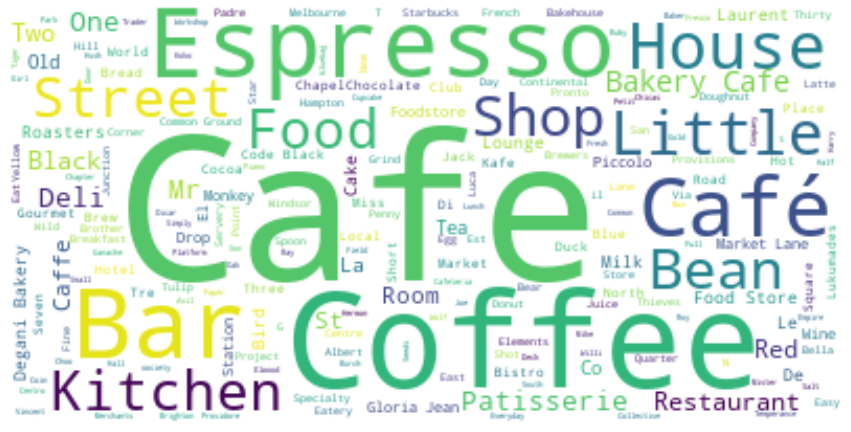

In [27]:
# Lets see in Coffee column what all information we have
plt.rcParams['figure.figsize'] = (15,10)
from wordcloud import WordCloud

coffee_names = WordCloud(
    background_color='white',
).generate(Melbourne_Coffee['Coffee'].str.cat(sep=' '))

# display the word cloud
plt.imshow(coffee_names, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
Melbourne_Coffee.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Coffee,Coffee Latitude,Coffee Longitude,Category
Neighborhood,,,,,,
Abbotsford,9,9,9,9,9,9
Albert Park,14,14,14,14,14,14
Alphington,2,2,2,2,2,2
Armadale,13,13,13,13,13,13
Ascot Vale,7,7,7,7,7,7
Ashburton,5,5,5,5,5,5
Ashwood,1,1,1,1,1,1
Aspendale,4,4,4,4,4,4
Balaclava,21,21,21,21,21,21


# We will now analyse each District

In [29]:
# one hot encoding
melbourne_onehot = pd.get_dummies(Melbourne_Coffee[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melbourne_onehot['Neighborhood'] = Melbourne_Coffee['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Australian Restaurant,Bakery,Bar,Bike Shop,Breakfast Spot,Bubble Tea Shop,Burger Joint,Café,Cheese Shop,Chocolate Shop,Coffee Shop,Cooking School,Creperie,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden Center,Gastropub,Gozleme Place,Greek Restaurant,Grocery Store,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Kosher Restaurant,Mediterranean Restaurant,Mexican Restaurant,Office,Organic Grocery,Pastry Shop,Pizza Place,Restaurant,Sandwich Place,Spanish Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Abbotsford,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Abbotsford,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Melbourne_Coffee['Category'].unique()

array(['Café', 'Pizza Place', 'Gastropub', 'Coffee Shop', 'Deli / Bodega',
       'Bakery', 'Diner', 'Asian Restaurant', 'Italian Restaurant',
       'Bike Shop', 'Cupcake Shop', 'Bubble Tea Shop', 'Breakfast Spot',
       'Australian Restaurant', 'Mediterranean Restaurant',
       'Kosher Restaurant', 'American Restaurant', 'Creperie',
       'Juice Bar', 'Sandwich Place', 'Chocolate Shop', 'Tea Room',
       'Donut Shop', 'Restaurant', 'Dessert Shop', 'Hotel Bar',
       'Japanese Restaurant', 'Burger Joint', 'Grocery Store',
       'Furniture / Home Store', 'Cheese Shop', 'Art Gallery',
       'Fast Food Restaurant', 'Fish & Chips Shop',
       'Vegetarian / Vegan Restaurant', 'Bar', 'Thai Restaurant',
       'Pastry Shop', 'Wine Bar', 'Hotel', 'Garden Center',
       'Food & Drink Shop', 'Office', 'French Restaurant',
       'Tapas Restaurant', 'Ice Cream Shop', 'Greek Restaurant',
       'Mexican Restaurant', 'Cooking School', 'Organic Grocery',
       'Vietnamese Restaurant', 'Sp

In [35]:
# We will remove extra columns which do not fit the criteria of a coffee shops e.g. Diner, Restaurants, bars etc

melbourne_onehot.drop(['Gastropub','Bakery', 'Diner', 'Asian Restaurant', 'Italian Restaurant',
       'Bike Shop','Australian Restaurant', 'Mediterranean Restaurant',
       'Kosher Restaurant', 'American Restaurant', 'Creperie',
       'Juice Bar', 'Sandwich Place', 'Chocolate Shop','Restaurant', 'Dessert Shop', 'Hotel Bar',
       'Japanese Restaurant', 'Burger Joint', 'Grocery Store',
       'Furniture / Home Store', 'Cheese Shop', 'Art Gallery',
       'Fast Food Restaurant', 'Fish & Chips Shop',
       'Vegetarian / Vegan Restaurant', 'Bar', 'Thai Restaurant',
       'Pastry Shop', 'Wine Bar', 'Hotel', 'Garden Center',
       'Food & Drink Shop', 'Office', 'French Restaurant',
       'Tapas Restaurant', 'Ice Cream Shop', 'Greek Restaurant',
       'Mexican Restaurant', 'Cooking School', 'Organic Grocery',
       'Vietnamese Restaurant', 'Spanish Restaurant', 'Gozleme Place',
       'Gaming Cafe', 'Food Truck'], axis=1, inplace=True)
melbourne_onehot.head()

,Neighborhood,Breakfast Spot,Bubble Tea Shop,Café,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop,Pizza Place,Tea Room
0,Abbotsford,0,0,1,0,0,0,0,0,0
1,Abbotsford,0,0,1,0,0,0,0,0,0
2,Abbotsford,0,0,0,0,0,0,0,1,0
3,Abbotsford,0,0,0,0,0,0,0,0,0
4,Abbotsford,0,0,1,0,0,0,0,0,0


# We will now group our neighbourhood by mean of the frequency of occurance of each category

In [36]:
melbourne_grouped = melbourne_onehot.groupby('Neighborhood').mean().reset_index()
melbourne_grouped

,Neighborhood,Breakfast Spot,Bubble Tea Shop,Café,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop,Pizza Place,Tea Room
0,Abbotsford,0.000000,0.000000,0.666667,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000
1,Albert Park,0.000000,0.000000,0.857143,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000
2,Alphington,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Armadale,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Ascot Vale,0.000000,0.000000,0.714286,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
5,Ashburton,0.000000,0.000000,0.800000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Ashwood,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Aspendale,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Balaclava,0.047619,0.000000,0.619048,0.238095,0.000000,0.000000,0.000000,0.000000,0.000000
9,Balwyn,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# We will now print each neighborhood and their 7 most common venues

In [37]:
num_top_venues = 7

for hood in melbourne_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = melbourne_grouped[melbourne_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbotsford----
             venue  freq
0             Café  0.67
1      Coffee Shop  0.11
2      Pizza Place  0.11
3   Breakfast Spot  0.00
4  Bubble Tea Shop  0.00
5     Cupcake Shop  0.00
6    Deli / Bodega  0.00


----Albert Park----
             venue  freq
0             Café  0.86
1    Deli / Bodega  0.07
2   Breakfast Spot  0.00
3  Bubble Tea Shop  0.00
4      Coffee Shop  0.00
5     Cupcake Shop  0.00
6       Donut Shop  0.00


----Alphington----
             venue  freq
0             Café   1.0
1   Breakfast Spot   0.0
2  Bubble Tea Shop   0.0
3      Coffee Shop   0.0
4     Cupcake Shop   0.0
5    Deli / Bodega   0.0
6       Donut Shop   0.0


----Armadale----
             venue  freq
0             Café   1.0
1   Breakfast Spot   0.0
2  Bubble Tea Shop   0.0
3      Coffee Shop   0.0
4     Cupcake Shop   0.0
5    Deli / Bodega   0.0
6       Donut Shop   0.0


----Ascot Vale----
             venue  freq
0             Café  0.71
1      Coffee Shop  0.14
2   Breakfast Spot  0.0

             venue  freq
0             Café   1.0
1   Breakfast Spot   0.0
2  Bubble Tea Shop   0.0
3      Coffee Shop   0.0
4     Cupcake Shop   0.0
5    Deli / Bodega   0.0
6       Donut Shop   0.0


----Hawthorn----
             venue  freq
0             Café  0.59
1      Coffee Shop  0.14
2   Breakfast Spot  0.09
3  Bubble Tea Shop  0.05
4     Cupcake Shop  0.05
5    Deli / Bodega  0.00
6       Donut Shop  0.00


----Hawthorn East----
             venue  freq
0             Café  0.75
1      Coffee Shop  0.11
2   Breakfast Spot  0.00
3  Bubble Tea Shop  0.00
4     Cupcake Shop  0.00
5    Deli / Bodega  0.00
6       Donut Shop  0.00


----Heidelberg----
             venue  freq
0             Café  0.78
1      Coffee Shop  0.11
2   Breakfast Spot  0.00
3  Bubble Tea Shop  0.00
4     Cupcake Shop  0.00
5    Deli / Bodega  0.00
6       Donut Shop  0.00


----Heidelberg Heights----
             venue  freq
0             Café   1.0
1   Breakfast Spot   0.0
2  Bubble Tea Shop   0.0
3      

             venue  freq
0             Café  0.62
1   Breakfast Spot  0.12
2      Coffee Shop  0.12
3    Deli / Bodega  0.12
4  Bubble Tea Shop  0.00
5     Cupcake Shop  0.00
6       Donut Shop  0.00


----Victoria Dock----
             venue  freq
0             Café  0.62
1      Coffee Shop  0.23
2       Donut Shop  0.04
3         Tea Room  0.02
4   Breakfast Spot  0.00
5  Bubble Tea Shop  0.00
6     Cupcake Shop  0.00


----West Footscray----
             venue  freq
0             Café   0.8
1      Coffee Shop   0.2
2   Breakfast Spot   0.0
3  Bubble Tea Shop   0.0
4     Cupcake Shop   0.0
5    Deli / Bodega   0.0
6       Donut Shop   0.0


----West Melbourne----
             venue  freq
0             Café  0.84
1      Coffee Shop  0.08
2       Donut Shop  0.04
3   Breakfast Spot  0.00
4  Bubble Tea Shop  0.00
5     Cupcake Shop  0.00
6    Deli / Bodega  0.00


----Williamstown----
             venue  freq
0             Café   1.0
1   Breakfast Spot   0.0
2  Bubble Tea Shop   0.0
3  

In [38]:
# Converting the above info into Pandas dataframe

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = melbourne_grouped['Neighborhood']

for ind in np.arange(melbourne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Abbotsford,Café,Coffee Shop,Pizza Place,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega
1,Albert Park,Café,Deli / Bodega,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Donut Shop
2,Alphington,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
3,Armadale,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
4,Ascot Vale,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop


In [41]:
neighborhoods_venues_sorted.shape

(122, 8)

<AxesSubplot:ylabel='1st Most Common Venue'>

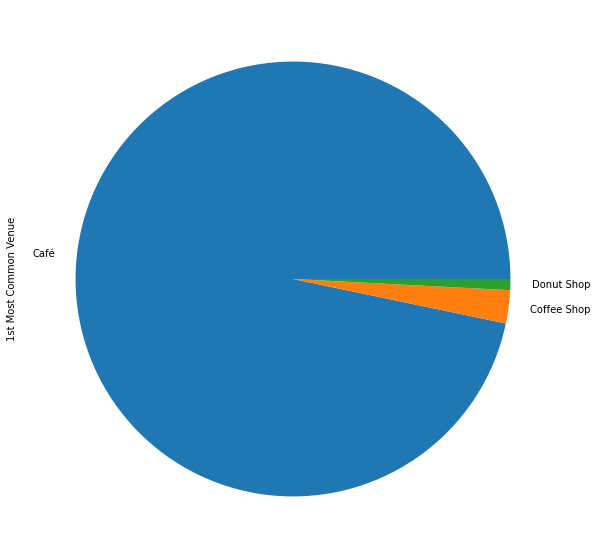

In [47]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='2nd Most Common Venue'>

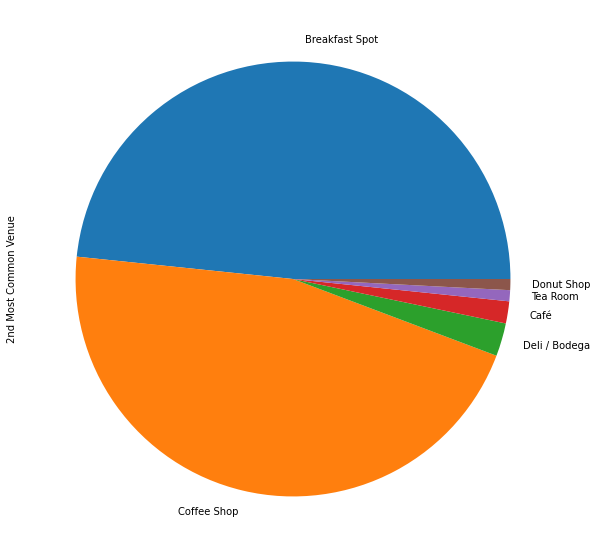

In [48]:
neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='3rd Most Common Venue'>

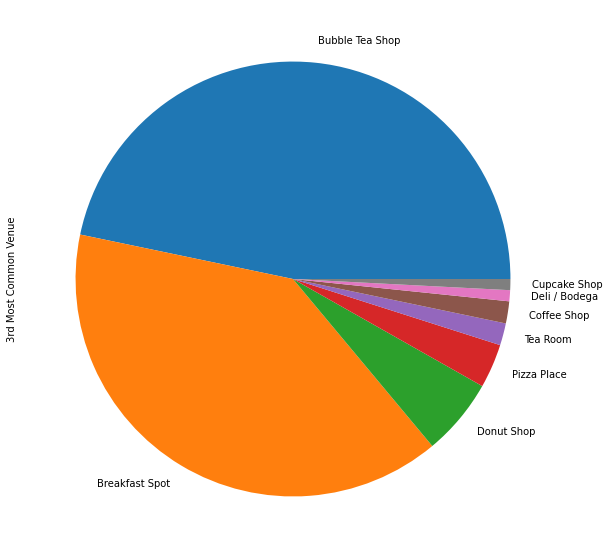

In [49]:
neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='4th Most Common Venue'>

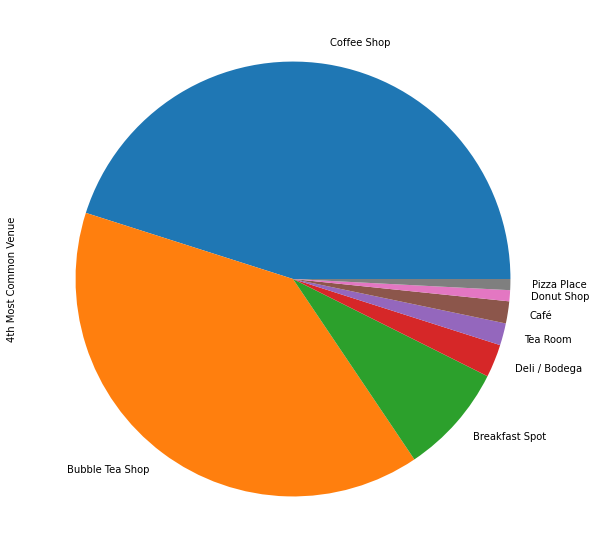

In [50]:
neighborhoods_venues_sorted['4th Most Common Venue'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='5th Most Common Venue'>

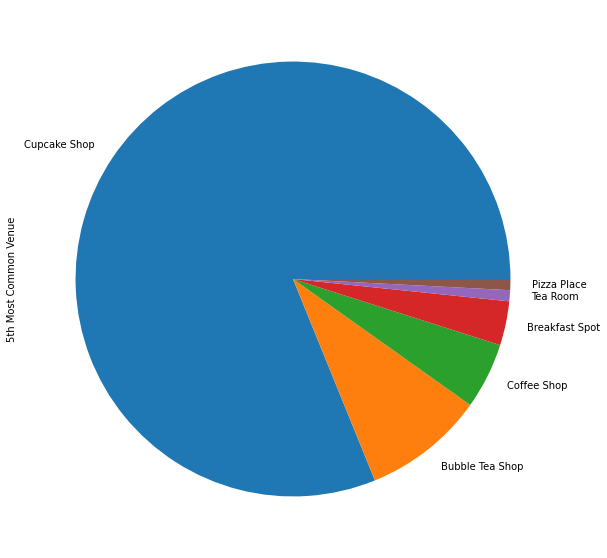

In [51]:
neighborhoods_venues_sorted['5th Most Common Venue'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='6th Most Common Venue'>

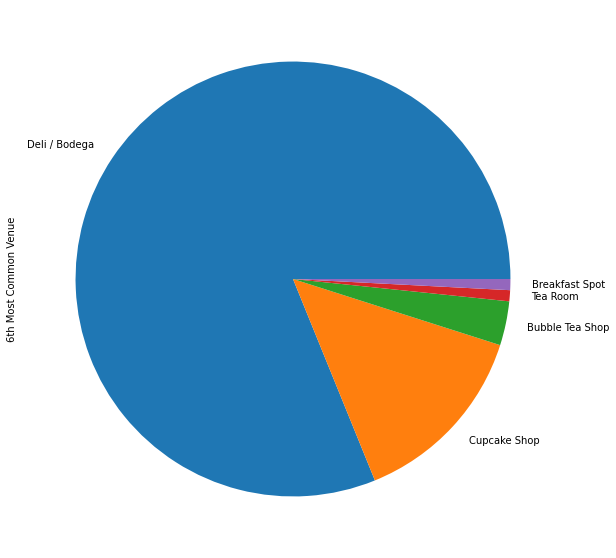

In [52]:
neighborhoods_venues_sorted['6th Most Common Venue'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='7th Most Common Venue'>

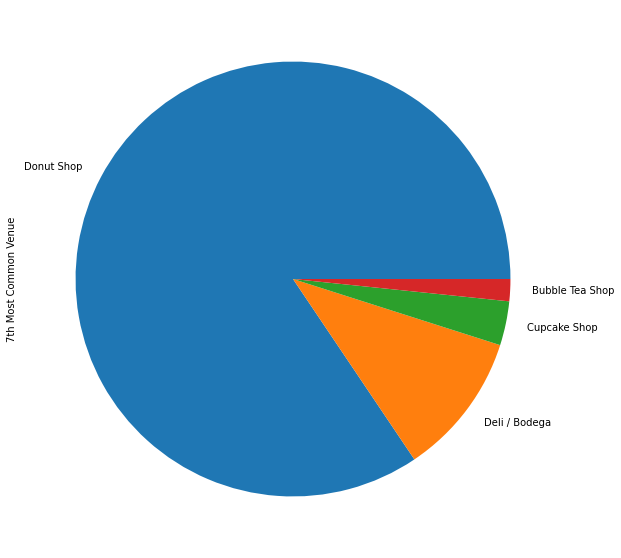

In [53]:
neighborhoods_venues_sorted['7th Most Common Venue'].value_counts().plot(kind='pie')

# Clustering Neighborhood

In [54]:
# set number of clusters
kclusters = 4

melbourne_grouped_clustering = melbourne_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 2, 2, 1, 1, 2, 2, 1, 2])

In [57]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

melbourne_merged = dist

# merge melbourne_grouped with Melbourne data to add latitude/longitude for each neighborhood
melbourne_merged = melbourne_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Melbourne Districts')

melbourne_merged.head() # check the last columns!

,Melbourne Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Abbotsford,-37.80306,144.99718,1.0,Café,Coffee Shop,Pizza Place,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega
1,Aerodrome Essendon,-37.75154,144.90951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Essendon,-37.75154,144.90951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albert Park,-37.84404,144.95126,2.0,Café,Deli / Bodega,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Donut Shop
5,Alphington,-37.77942,145.02503,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop


In [58]:
melbourne_no_coffee = melbourne_merged[melbourne_merged['1st Most Common Venue'].isnull()]
melbourne_no_coffee

,Melbourne Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
1,Aerodrome Essendon,-37.751540,144.909510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Essendon,-37.751540,144.909510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Altona,-37.863820,144.824820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Altona North,-37.830470,144.841340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Footscray West,-37.808946,144.927116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Balwyn North,-37.793890,145.077900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Beaumaris,-37.985890,145.051770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Black Rock,-37.968930,145.030700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Box Hill South,-37.837830,145.120170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Caulfield South,-37.895390,145.013220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# We will delete these NaN values from our new dataset

In [60]:
melbourne_merged = melbourne_merged.dropna()
melbourne_merged.head()

,Melbourne Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Abbotsford,-37.80306,144.99718,1.0,Café,Coffee Shop,Pizza Place,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega
3,Albert Park,-37.84404,144.95126,2.0,Café,Deli / Bodega,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Donut Shop
5,Alphington,-37.77942,145.02503,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
10,Armadale,-37.85551,145.02089,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
12,Ascot Vale,-37.77546,144.91556,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop


Lets visualize our clusters

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['Latitude'], melbourne_merged['Longitude'], melbourne_merged['Melbourne Districts'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Lets look at the Clusters

In [64]:
cluster1 = melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 0]
cluster1

,Melbourne Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
37,Melbourne,-37.81739,144.96751,0.0,Café,Coffee Shop,Cupcake Shop,Donut Shop,Tea Room,Breakfast Spot,Bubble Tea Shop
68,Caulfield,-37.87995,145.02262,0.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
122,Fitzroy North,-37.78348,144.98368,0.0,Coffee Shop,Café,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
183,Maidstone,-37.78314,144.86964,0.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
208,Moorabbin,-37.94252,145.06004,0.0,Coffee Shop,Café,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
232,Ormond,-37.90387,145.03996,0.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
252,Reservoir,-37.70815,145.00070,0.0,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Café,Cupcake Shop,Deli / Bodega,Donut Shop


In [65]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster1['Latitude'], cluster1['Longitude'], cluster1['Melbourne Districts'], cluster1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [66]:
cluster2 = melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 1]
cluster2

,Melbourne Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Abbotsford,-37.80306,144.99718,1.0,Café,Coffee Shop,Pizza Place,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega
12,Ascot Vale,-37.77546,144.91556,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
16,Ashburton,-37.86310,145.07716,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
20,Hawthorn East,-37.83028,145.05552,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
21,Hawthorn,-37.82275,145.03532,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
22,Balaclava,-37.86903,144.99565,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
38,Box Hill,-37.81746,145.12404,1.0,Café,Coffee Shop,Tea Room,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega
43,Brighton,-37.90937,144.99746,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop
48,Brunswick,-37.76947,144.96171,1.0,Café,Coffee Shop,Donut Shop,Pizza Place,Breakfast Spot,Bubble Tea Shop,Cupcake Shop
49,Brunswick East,-37.76850,144.97574,1.0,Café,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Cupcake Shop,Deli / Bodega,Donut Shop


In [67]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster2['Latitude'], cluster2['Longitude'], cluster2['Melbourne Districts'], cluster2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [68]:
cluster3 = melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 2]
cluster3

,Melbourne Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
3,Albert Park,-37.84404,144.95126,2.0,Café,Deli / Bodega,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Donut Shop
5,Alphington,-37.77942,145.02503,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
10,Armadale,-37.85551,145.02089,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
18,Ashwood,-37.86691,145.10292,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
19,Aspendale,-38.02666,145.10202,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
23,Balwyn,-37.81150,145.08159,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
27,Coburg North,-37.72371,144.98314,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
31,Bentleigh,-37.91792,145.03450,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
32,Bentleigh East,-37.92245,145.06937,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop
33,McKinnon,-37.91114,145.03918,2.0,Café,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega,Donut Shop


In [69]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster3['Latitude'], cluster3['Longitude'], cluster3['Melbourne Districts'], cluster3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
cluster4 = melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 3]
cluster4

,Melbourne Districts,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
77,Cheltenham,-37.96762,145.07388,3.0,Donut Shop,Breakfast Spot,Bubble Tea Shop,Café,Coffee Shop,Cupcake Shop,Deli / Bodega
118,Fawkner,-37.70135,144.96275,3.0,Café,Donut Shop,Breakfast Spot,Bubble Tea Shop,Coffee Shop,Cupcake Shop,Deli / Bodega


In [75]:
map_melbourne = folium.Map(location=[latitude,longitude], zoom_start=11)
for lat, lon, poi, cluster in zip(cluster4['Latitude'], cluster4['Longitude'], cluster4['Melbourne Districts'], cluster4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Results and Discussions

Our analysis shows that there are many coffee options in Cluster number 2 and 3. There is an oppurtunity to open a coffee house in Cluster number 1 and 4. Number 4 is interesting as it is nearby Airport and ideally should be good location.

Cluster 2 and 3 are more towards the main suburb, whereas, cluster 1 and 4 are little far off. 

From the above analysis, we can also understand in cluster 1 and 4 there are not many dedicated coffee shops, which states that many restaurants/bar may be selling coffee. This gives an oppurtunity to the new business to open a fancy coffee shop and be successful.

Cluster 2 and 3, may have lot of coffee shops. On further analysis it was observed both clusters are close to Albert Park and Melbourne Station. Albert Part is famous for Formula 1 race track and we have multiple sporting activities near Melbourne station such as Melbourne Cricket Ground, Melbourne Tennis Stadium. This justifies why so many cafes are around these landmark point

# Conclusion

Purpose of this project was to cluster Melbourne districts based on coffee shops and we were able to do it successfully. If any business wants to open a new coffee shop in Melbourne, we can assist them with the clustering we have done on the district. Cluster 2 and Cluster 3 are more towards down town, whereas, cluster 1 and 4 are more spread out.


Final decision will be made by the stakeholder in which cluster they are looking to open a new cafe. 